This memo is written by Thai Pangsakulyanont, based on Assoc. Prof. Kitsana Waiyamai's lecture, "_Cluster Analysis_," taught in 219333 course "Data Mining."

In [1]:
from math import hypot
from pylab import *

In [2]:
%matplotlib inline

# Introduction

Cluster analysis divides a set of objects into clusters with similar attributes. It's unsupervised.

# K-Means Clustering

Is a partitional clustering. Let's consider these objects:

In [3]:
class DataPoint:
    def __init__(self, label, point):
        self.label = label
        self.point = point
    def __repr__(self):
        return '%s(%d,%d)' % (self.label,
            self.point[0], self.point[1])

A1 = DataPoint('A1', ( 3,  8))
A2 = DataPoint('A2', ( 9,  4))
A3 = DataPoint('A3', ( 4,  9))
A4 = DataPoint('A4', ( 2,  2))
A5 = DataPoint('A5', (10,  5))
A6 = DataPoint('A6', ( 2,  4))
A7 = DataPoint('A7', ( 6,  8))
A8 = DataPoint('A8', ( 4,  3))
A9 = DataPoint('A9', ( 4,  7))

data = [A1, A2, A3, A4, A5,
        A6, A7, A8, A9]

Let's visualize it...

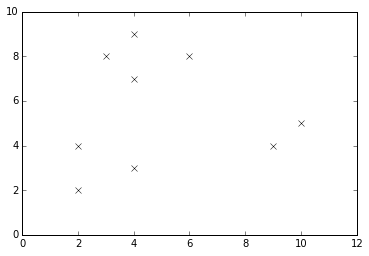

In [4]:
def x(point): return point[0]
def y(point): return point[1]

def plot_points(points, style='o'):
    xlim(0, 12)
    ylim(0, 10)
    plot([x(point) for point in points],
         [y(point) for point in points], style)

plot_points([item.point for item in data], 'kx')

## Initial Clustering

Given an "initial" clustering with the following "center"s (we can assign them arbitrarily).

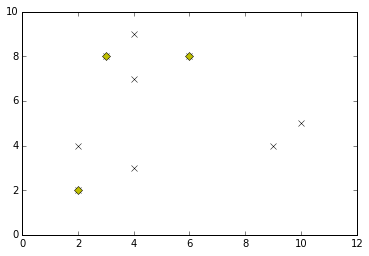

In [5]:
clusters = [
    A1.point,
    A4.point,
    A7.point,
]

plot_points([item.point for item in data], 'kx')
plot_points(clusters, 'yD')

## Assigning Each Item to Nearest Cluster

Next, we assign every item to the nearest center.

For simplicity, here are some functions to help.

First, we have to find which cluster is nearest to the point.

In [6]:
def dist(a, b):
    return math.sqrt((x(a) - x(b)) ** 2 + (y(a) - y(b)) ** 2)
def nearest_cluster(point):
    """
    Returns the index of cluster that the point
    is nearest.
    """
    distance = lambda index: dist(point, clusters[index])
    return min(range(len(clusters)), key=distance)

[nearest_cluster(A1.point),
 nearest_cluster(A4.point),
 nearest_cluster(A7.point)]

[0, 1, 2]

Then we apply that to each point to obtain the cluster index of each point.

In [7]:
def cluster():
    return [nearest_cluster(item.point)
        for item in data]

clustering = cluster()
clustering

[0, 2, 0, 1, 2, 1, 2, 1, 0]

Let's visualize it. Let's see each point of each cluster.

In [8]:
def group_by_cluster():
    groups = [[] for cluster in clusters]
    for i in range(len(data)):
        group = clustering[i]
        groups[group].append(data[i])
    return groups

groups = group_by_cluster()
groups

[[A1(3,8), A3(4,9), A9(4,7)],
 [A4(2,2), A6(2,4), A8(4,3)],
 [A2(9,4), A5(10,5), A7(6,8)]]

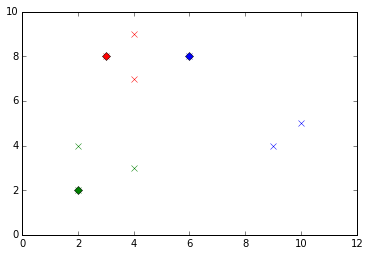

In [9]:
def visualize():
    colors = ['r', 'g', 'b']
    for i in range(len(clusters)):
        plot_points([item.point for item in groups[i]],
                    colors[i] + 'x')
        plot_points([clusters[i]], colors[i] + 'D')
visualize()

## Moving the center of each cluster

To do that, we have to find the means of each cluster. Let's try the red one.

In [10]:
def center(group):
    sum_x = 0.0
    sum_y = 0.0
    count = len(group)
    for item in group:
        sum_x += item.point[0]
        sum_y += item.point[1]
    return (sum_x / count, sum_y / count)

In [11]:
center(groups[0])

(3.6666666666666665, 8.0)

Now we move the center of every group.

In [12]:
def recompute_centers():
    return [center(group) for group in groups]

clusters = recompute_centers()

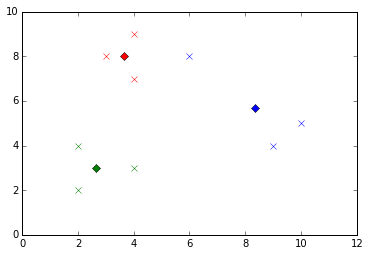

In [13]:
visualize()

## Repeat it!

In [14]:
clustering = cluster()
groups = group_by_cluster()
groups

[[A1(3,8), A3(4,9), A7(6,8), A9(4,7)],
 [A4(2,2), A6(2,4), A8(4,3)],
 [A2(9,4), A5(10,5)]]

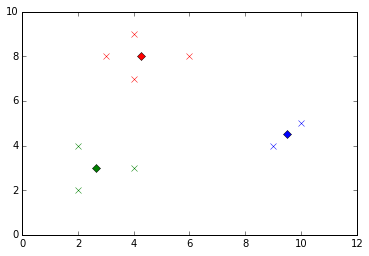

In [15]:
clusters = recompute_centers()
visualize()

## Again!

In [16]:
clustering = cluster()
groups = group_by_cluster()
groups

[[A1(3,8), A3(4,9), A7(6,8), A9(4,7)],
 [A4(2,2), A6(2,4), A8(4,3)],
 [A2(9,4), A5(10,5)]]

It seems that nothing has changed, that means the algorithm has converged.

In [17]:
1+1

2

## Distance Evaluation

The most common measure is the Sum of Squared Error (distance to the center).

In [18]:
def sum_of_squared_error():
    sse = 0.0
    for i in range(len(clusters)):
        center = clusters[i]
        for item in groups[i]:
            sse += dist(item.point, center)
    return sse

sum_of_squared_error()

10.212800558824586

# Hierarchical Clustering

We'll only talk about the agglomerative method, as it's the most popular method.
First, each data item are in its own cluster.

In [19]:
original_clusters = [1, 2, 3, 4, 5]
clusters = original_clusters[:]

When we group the data into cluster, we simply put them into an array. For example, if we want to put `1` and `2` together, it becomes:

```python
[3, 4, 5, [1, 2]]
```

## The proximity between items

Proximity means the nearness or farness.
So we can use either distance or similarity.
In this example, we will use the _similarity_ metric.

We define the similarity between data point $i$ and $j$ using this function:

In [20]:
similarity_matrix = [
    [1.00],
    [0.10, 1.00],
    [0.41, 0.64, 1.00],
    [0.55, 0.47, 0.44, 1.00],
    [0.35, 0.98, 0.85, 0.76, 1.00],
]

def similarity(i, j):
    i -= 1
    j -= 1
    if j > i: i, j = j, i
    return similarity_matrix[i][j]

print similarity(1, 4)
print similarity(4, 1)

0.55
0.55


Okay, it works!

The next thing is that we need a way to iterate over a cluster of arbitrary complexity. We do that using Python's generator.

In [21]:
def items(cluster):
    if type(cluster) == list:
        for item in cluster:
            for x in items(item):
                yield x
    else:
        yield cluster

print [x for x in items(1)]
print [x for x in items([1, 2])]
print [x for x in items([[1, 3], 2])]

[1]
[1, 2]
[1, 3, 2]


## Inter-cluster distance

Ok! That's great! Now we need a way to measure the similarity or distance between two clusters. There are many ways:

### Single Linkage

Single linkage is a measure between the closest point between two clusters.

For similarity-based proximity, this means the maximum similarity.

In [22]:
def single_linkage((a, b)):
    return max(similarity(i, j)
        for i in items(a) for j in items(b))

In [23]:
single_linkage((1, [3, 4]))

0.55

### Complete Linkage

Complete linkage is a measure between the furthest point between two clusters.

For similarity-based proximity, this means the minimum similarity.

In [24]:
def complete_linkage((a, b)):
    return min(similarity(i, j)
        for i in items(a) for j in items(b))

In [25]:
complete_linkage((1, [3, 4]))

0.41

## Merging

Now, we find two closest clusters.

In [26]:
linkage = single_linkage

def get_closest_clusters():
    return max(((a, b)
        for a in clusters for b in clusters if a != b),
            key=linkage)

x, y = get_closest_clusters()
x, y

(2, 5)

Now we merge them.

In [27]:
def merge_closest_clusters():
    x, y = get_closest_clusters()
    clusters.remove(x)
    clusters.remove(y)
    clusters.append([x, y])

In [28]:
print "Before:", clusters
merge_closest_clusters()
print "After: ", clusters

Before: [1, 2, 3, 4, 5]
After:  [1, 3, 4, [2, 5]]


We keep doing that until we reach a single cluster.

In [29]:
while len(clusters) > 1:
    merge_closest_clusters()
    print clusters

[1, 4, [3, [2, 5]]]
[1, [4, [3, [2, 5]]]]
[[1, [4, [3, [2, 5]]]]]


And that's our final cluster!

In [30]:
cluster, = clusters
cluster

[1, [4, [3, [2, 5]]]]

__Let's try again with complete linkage.__

In [31]:
clusters = original_clusters[:]
clusters

[1, 2, 3, 4, 5]

In [32]:
linkage = complete_linkage
while len(clusters) > 1:
    merge_closest_clusters()
    print clusters

[1, 3, 4, [2, 5]]
[1, 4, [3, [2, 5]]]
[[3, [2, 5]], [1, 4]]
[[[3, [2, 5]], [1, 4]]]


In [33]:
cluster, = clusters
cluster

[[3, [2, 5]], [1, 4]]

And that's it!

# Validation

Now that we grouped items into clusters, here's how to validate them.

## Interpretability

- Compare the segment to the population to identify patterns.
- Then you can assign meaningful labels to each cluster.

## Accuracy

- Requires some existing labels.
- Using accuracy, precision, recall.

## Separation

- Ratio of between-cluster variation to within-cluster variation.